In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


# inputs = tf.keras.Input(shape=(3,))
# x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
# outputs = tf.keras.layers.Dense(5, activation=tf.nn.softmax)(x)
# model = tf.keras.Model(inputs=inputs, outputs=outputs)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
l = []
a = []
start = time.time()
t = []
loss, accuracy = model.evaluate(x_test, y_test)

while loss > 0.09:
    l.append(loss)
    print(loss, accuracy)
    a.append(accuracy)
    t.append(time.time() - start)
    model.fit(x_train, y_train, epochs=3)
    loss, accuracy = model.evaluate(x_test, y_test)
 

313/313 [==============================] - 2s 7ms/step - loss: 2.3230 - accuracy: 0.0528
2.3230063915252686 0.052799999713897705
Epoch 1/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2591 - accuracy: 0.9255
Epoch 2/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1054 - accuracy: 0.9668
Epoch 3/3
313/313 [==============================] - 1s 5ms/step - loss: 0.1051 - accuracy: 0.9683
0.10508670657873154 0.9682999849319458
Epoch 1/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0524 - accuracy: 0.9829
Epoch 2/3
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0398 - accuracy: 0.9872
Epoch 3/3
313/313 [==============================] - 2s 5ms/step - loss: 0.0944 - accuracy: 0.9751
0.09441721439361572 0.9750999808311462
Epoch 1/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0255 - accuracy: 0.9913
Epoch 2/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0204 -

KeyboardInterrupt: 

313/313 [==============================] - 2s 5ms/step - loss: 0.1321 - accuracy: 0.9740
[2.3230063915252686, 0.10508670657873154, 0.09441721439361572, 0.10887520760297775, 0.1332804560661316]
[0.052799999713897705, 0.9682999849319458, 0.9750999808311462, 0.973800003528595, 0.9746000170707703]
[2.5495734214782715, 56.04116153717041, 108.10481595993042, 160.78875827789307, 219.7654948234558]


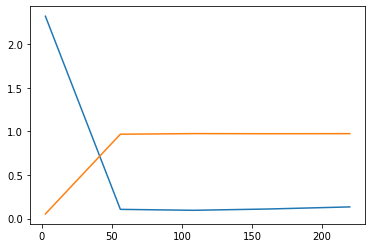

0.13206395506858826 0.9739999771118164


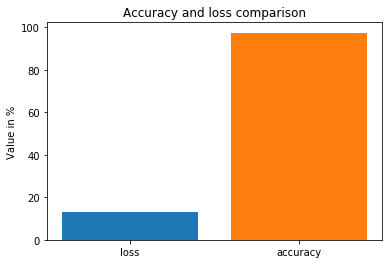

In [3]:
loss, accuracy = model.evaluate(x_test, y_test)
print(l)
print(a)
print(t)
plt.plot(t, l)
plt.plot(t, a)
plt.show()
print(loss, accuracy)

plt.title('Accuracy and loss comparison')
plt.bar('loss', loss*100)
plt.bar("accuracy", accuracy*100)
plt.ylabel('Value in %')
plt.show()

In [4]:
model.save("Numbers_identification.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Numbers_identification.model/assets


In [5]:
new_model = tf.keras.models.load_model('Numbers_identification.model')

In [13]:
print(x_train.shape, x_test.shape)
results = model.predict([x_test])

(60000, 28, 28) (10000, 28, 28)


In [17]:
print(np.argmax(results[100]))

6


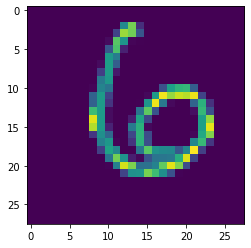

In [16]:
plt.imshow(x_test[100])